In [46]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_excel("RankingEscola1.xlsx", sheet_name='2017&2019')
data.head(2)

,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power
0,2017,Colégio Nossa Senhora do Rosário,Porto,14.92,1,Private School,Portugal,15.59,3,13.22,28,129.55
1,2017,Academia de Música de Santa Cecília,Lisboa,14.71,2,Private School,Portugal,16.28,1,12.26,77,163.70


In [48]:
data.tail(2)

,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power
1126,2019,Escola Secundária Fonseca Benevides,Lisboa,6.25,563,Public School,Portugal,5.2,557,7.34,561,163.7
1127,2019,Colégio de Gaia,Vila Nova de Gaia,3.30,564,Private School,Portugal,5.2,558,3.30,562,100.6


In [49]:
year = 2019
filtered2019 = data[data['Year']==year]
filtered2019

,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power
564,2019,Academia de Música de Santa Cecília,Lisboa,16.22,1,Private School,Portugal,16.300,5,17.730,1,163.70
565,2019,Colégio Nossa Senhora do Rosário,Porto,15.47,2,Private School,Portugal,15.530,11,15.340,8,129.55
566,2019,Colégio Internacional de Vilamoura,Loulé,15.07,3,Private School,Portugal,14.970,23,15.550,5,109.30
567,2019,Colégio D. Diogo de Sousa,Braga,14.86,4,Private School,Portugal,15.220,16,14.100,23,108.80
568,2019,Salesianos de Lisboa,Lisboa,14.51,5,Private School,Portugal,14.630,29,14.520,15,163.70
...,...,...,...,...,...,...,...,...,...,...,...,...
1123,2019,Escola Básica Integrada Mouzinho da Silveira,Corvo,7.54,560,Public School,Portugal,9.025,436,9.975,512,74.90
1124,2019,Escola Básica e Secundária Dr. Azevedo Neves,Amadora,7.23,561,Public School,Portugal,10.400,299,9.700,526,100.10
1125,2019,Escola Básica e Secundária Matilde Rosa Araújo,Cascais,6.78,562,Public School,Portugal,5.200,556,8.520,557,118.00
1126,2019,Escola Secundária Fonseca Benevides,Lisboa,6.25,563,Public School,Portugal,5.200,557,7.340,561,163.70


In [50]:
filtered2019["National Average (by School)"].mean()

10.512092198581565

In [51]:
def standardize(col):
    z= (col - col.mean())/col.std()
    return z

In [52]:
filtered2019['National Average (by School) _std'] = standardize(filtered2019)['National Average (by School)']
filtered2019

<ipython-input-52-70f28387b815>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2019['National Average (by School) _std'] = standardize(filtered2019)['National Average (by School)']


,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std
564,2019,Academia de Música de Santa Cecília,Lisboa,16.22,1,Private School,Portugal,16.300,5,17.730,1,163.70,4.025990
565,2019,Colégio Nossa Senhora do Rosário,Porto,15.47,2,Private School,Portugal,15.530,11,15.340,8,129.55,3.496989
566,2019,Colégio Internacional de Vilamoura,Loulé,15.07,3,Private School,Portugal,14.970,23,15.550,5,109.30,3.214854
567,2019,Colégio D. Diogo de Sousa,Braga,14.86,4,Private School,Portugal,15.220,16,14.100,23,108.80,3.066734
568,2019,Salesianos de Lisboa,Lisboa,14.51,5,Private School,Portugal,14.630,29,14.520,15,163.70,2.819866
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,2019,Escola Básica Integrada Mouzinho da Silveira,Corvo,7.54,560,Public School,Portugal,9.025,436,9.975,512,74.90,-2.096322
1124,2019,Escola Básica e Secundária Dr. Azevedo Neves,Amadora,7.23,561,Public School,Portugal,10.400,299,9.700,526,100.10,-2.314976
1125,2019,Escola Básica e Secundária Matilde Rosa Araújo,Cascais,6.78,562,Public School,Portugal,5.200,556,8.520,557,118.00,-2.632377
1126,2019,Escola Secundária Fonseca Benevides,Lisboa,6.25,563,Public School,Portugal,5.200,557,7.340,561,163.70,-3.006205


<AxesSubplot:>

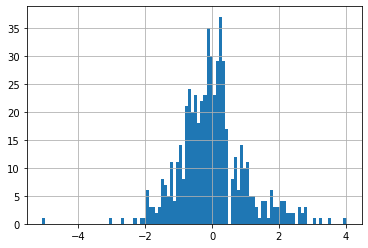

In [53]:
filtered2019['National Average (by School) _std'].hist(bins=100)

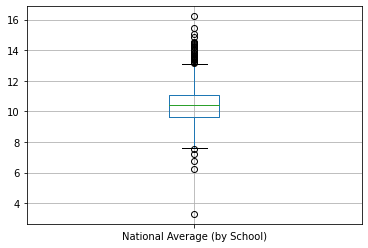

In [54]:
filtered2019.boxplot(column='National Average (by School)')

plt.show()

In [55]:
def outlier2019(row):
    q1 = np.percentile(filtered2019['National Average (by School)'], 25)  
    q3 = np.percentile(filtered2019['National Average (by School)'], 75)
    int = q3 - q1
    out1 = q1 - 1.5 * int
    out3 = q3 + 1.5 * int
    
    if row['National Average (by School)'] >= out3:
        return "Outlier"
    if row['National Average (by School)'] <= out1:
        return "Outlier"
    else:
        return "No outlier"


filtered2019['Outlier'] = filtered2019.apply(outlier2019, axis=1)
filtered2019

<ipython-input-55-60d9c12a119e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2019['Outlier'] = filtered2019.apply(outlier2019, axis=1)


,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std,Outlier
564,2019,Academia de Música de Santa Cecília,Lisboa,16.22,1,Private School,Portugal,16.300,5,17.730,1,163.70,4.025990,Outlier
565,2019,Colégio Nossa Senhora do Rosário,Porto,15.47,2,Private School,Portugal,15.530,11,15.340,8,129.55,3.496989,Outlier
566,2019,Colégio Internacional de Vilamoura,Loulé,15.07,3,Private School,Portugal,14.970,23,15.550,5,109.30,3.214854,Outlier
567,2019,Colégio D. Diogo de Sousa,Braga,14.86,4,Private School,Portugal,15.220,16,14.100,23,108.80,3.066734,Outlier
568,2019,Salesianos de Lisboa,Lisboa,14.51,5,Private School,Portugal,14.630,29,14.520,15,163.70,2.819866,Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,2019,Escola Básica Integrada Mouzinho da Silveira,Corvo,7.54,560,Public School,Portugal,9.025,436,9.975,512,74.90,-2.096322,Outlier
1124,2019,Escola Básica e Secundária Dr. Azevedo Neves,Amadora,7.23,561,Public School,Portugal,10.400,299,9.700,526,100.10,-2.314976,Outlier
1125,2019,Escola Básica e Secundária Matilde Rosa Araújo,Cascais,6.78,562,Public School,Portugal,5.200,556,8.520,557,118.00,-2.632377,Outlier
1126,2019,Escola Secundária Fonseca Benevides,Lisboa,6.25,563,Public School,Portugal,5.200,557,7.340,561,163.70,-3.006205,Outlier


In [56]:
var = "Outlier"
filtered2019_out = filtered2019[filtered2019['Outlier']==var]
filtered2019_out

,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std,Outlier
564,2019,Academia de Música de Santa Cecília,Lisboa,16.22,1,Private School,Portugal,16.300,5,17.730,1,163.70,4.025990,Outlier
565,2019,Colégio Nossa Senhora do Rosário,Porto,15.47,2,Private School,Portugal,15.530,11,15.340,8,129.55,3.496989,Outlier
566,2019,Colégio Internacional de Vilamoura,Loulé,15.07,3,Private School,Portugal,14.970,23,15.550,5,109.30,3.214854,Outlier
567,2019,Colégio D. Diogo de Sousa,Braga,14.86,4,Private School,Portugal,15.220,16,14.100,23,108.80,3.066734,Outlier
568,2019,Salesianos de Lisboa,Lisboa,14.51,5,Private School,Portugal,14.630,29,14.520,15,163.70,2.819866,Outlier
569,2019,Colégio Luso-Francês,Porto,14.47,6,Private School,Portugal,15.190,17,15.470,6,129.55,2.791653,Outlier
570,2019,Colégio da Rainha Santa Isabel,Coimbra,14.44,7,Private School,Portugal,15.180,18,13.910,30,126.30,2.770493,Outlier
571,2019,Colégio de Nossa Senhora da Assunção,Anadia,14.41,8,Private School,Portugal,15.790,9,15.210,11,80.40,2.749333,Outlier
572,2019,Colégio do Sagrado Coração de Maria,Lisboa,14.36,9,Private School,Portugal,14.460,31,14.690,14,163.70,2.714066,Outlier
573,2019,Colégio Moderno,Lisboa,14.26,10,Private School,Portugal,14.760,25,14.990,12,163.70,2.643533,Outlier


In [57]:
filtered2019['Outlier'].value_counts()

No outlier    528
Outlier        36
Name: Outlier, dtype: int64

In [58]:
filtered2019['bins'] = pd.cut(filtered2019['Buying Power'], bins=5)
filtered2019

<ipython-input-58-654c054e83b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2019['bins'] = pd.cut(filtered2019['Buying Power'], bins=5)


,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std,Outlier,bins
564,2019,Academia de Música de Santa Cecília,Lisboa,16.22,1,Private School,Portugal,16.300,5,17.730,1,163.70,4.025990,Outlier,"(141.9, 163.7]"
565,2019,Colégio Nossa Senhora do Rosário,Porto,15.47,2,Private School,Portugal,15.530,11,15.340,8,129.55,3.496989,Outlier,"(120.1, 141.9]"
566,2019,Colégio Internacional de Vilamoura,Loulé,15.07,3,Private School,Portugal,14.970,23,15.550,5,109.30,3.214854,Outlier,"(98.3, 120.1]"
567,2019,Colégio D. Diogo de Sousa,Braga,14.86,4,Private School,Portugal,15.220,16,14.100,23,108.80,3.066734,Outlier,"(98.3, 120.1]"
568,2019,Salesianos de Lisboa,Lisboa,14.51,5,Private School,Portugal,14.630,29,14.520,15,163.70,2.819866,Outlier,"(141.9, 163.7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,2019,Escola Básica Integrada Mouzinho da Silveira,Corvo,7.54,560,Public School,Portugal,9.025,436,9.975,512,74.90,-2.096322,Outlier,"(54.591, 76.5]"
1124,2019,Escola Básica e Secundária Dr. Azevedo Neves,Amadora,7.23,561,Public School,Portugal,10.400,299,9.700,526,100.10,-2.314976,Outlier,"(98.3, 120.1]"
1125,2019,Escola Básica e Secundária Matilde Rosa Araújo,Cascais,6.78,562,Public School,Portugal,5.200,556,8.520,557,118.00,-2.632377,Outlier,"(98.3, 120.1]"
1126,2019,Escola Secundária Fonseca Benevides,Lisboa,6.25,563,Public School,Portugal,5.200,557,7.340,561,163.70,-3.006205,Outlier,"(141.9, 163.7]"


In [59]:
def bins_group2019(row):
    if str(row['bins']) =="(141.9, 163.7]":
        return "Very High"
    elif str(row['bins']) =="(120.1, 141.9]":
        return "High"
    elif str(row['bins']) =="(98.3, 120.1]":
        return "Medium"
    elif str(row['bins']) =="(76.5, 98.3]":
        return "Low"
    elif str(row['bins']) =="(54.591, 76.5]":
        return  "Very Low"
    else:
        return 0

In [60]:
filtered2019['Group_bins'] = filtered2019.apply(bins_group2019, axis=1)
filtered2019

<ipython-input-60-a237735a6dcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2019['Group_bins'] = filtered2019.apply(bins_group2019, axis=1)


,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std,Outlier,bins,Group_bins
564,2019,Academia de Música de Santa Cecília,Lisboa,16.22,1,Private School,Portugal,16.300,5,17.730,1,163.70,4.025990,Outlier,"(141.9, 163.7]",Very High
565,2019,Colégio Nossa Senhora do Rosário,Porto,15.47,2,Private School,Portugal,15.530,11,15.340,8,129.55,3.496989,Outlier,"(120.1, 141.9]",High
566,2019,Colégio Internacional de Vilamoura,Loulé,15.07,3,Private School,Portugal,14.970,23,15.550,5,109.30,3.214854,Outlier,"(98.3, 120.1]",Medium
567,2019,Colégio D. Diogo de Sousa,Braga,14.86,4,Private School,Portugal,15.220,16,14.100,23,108.80,3.066734,Outlier,"(98.3, 120.1]",Medium
568,2019,Salesianos de Lisboa,Lisboa,14.51,5,Private School,Portugal,14.630,29,14.520,15,163.70,2.819866,Outlier,"(141.9, 163.7]",Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,2019,Escola Básica Integrada Mouzinho da Silveira,Corvo,7.54,560,Public School,Portugal,9.025,436,9.975,512,74.90,-2.096322,Outlier,"(54.591, 76.5]",Very Low
1124,2019,Escola Básica e Secundária Dr. Azevedo Neves,Amadora,7.23,561,Public School,Portugal,10.400,299,9.700,526,100.10,-2.314976,Outlier,"(98.3, 120.1]",Medium
1125,2019,Escola Básica e Secundária Matilde Rosa Araújo,Cascais,6.78,562,Public School,Portugal,5.200,556,8.520,557,118.00,-2.632377,Outlier,"(98.3, 120.1]",Medium
1126,2019,Escola Secundária Fonseca Benevides,Lisboa,6.25,563,Public School,Portugal,5.200,557,7.340,561,163.70,-3.006205,Outlier,"(141.9, 163.7]",Very High


In [61]:
filtered2019["Group_bins"].value_counts()

Low          241
Very Low     117
Medium       113
High          49
Very High     44
Name: Group_bins, dtype: int64

In [62]:
datatoexcel = pd.ExcelWriter('Fred&FGFinal.xlsx')
  
# write DataFrame to excel
filtered2019.to_excel(datatoexcel)

datatoexcel.save()

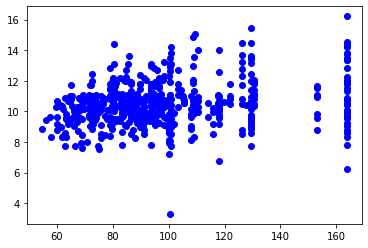

In [64]:
 plt.scatter(filtered2019['Buying Power'], filtered2019['National Average (by School)'], color="blue")

In [66]:
filtered2019[['Buying Power','National Average (by School)']].corr()

,Buying Power,National Average (by School)
Buying Power,1.000000,0.240899
National Average (by School),0.240899,1.000000


In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2017[['Buying Power']]
y = filtered2017['National Average (by School)']

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2019[['Buying Power']]
y = filtered2019['National Average (by School)']

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [ ]:
display(result.score(x,y))

In [73]:
filtered2019_private = filtered2019[filtered2019['Public School /Private School']=="Private School"]

In [74]:
filtered2019_public = filtered2019[filtered2019['Public School /Private School']=="Public School"]

In [75]:
filtered2019_private["National Average (by School)"].mean()

11.905865384615385

In [76]:
filtered2019_public["National Average (by School)"].mean()

10.196978260869566

9.227972465215075

array([0.01320712])

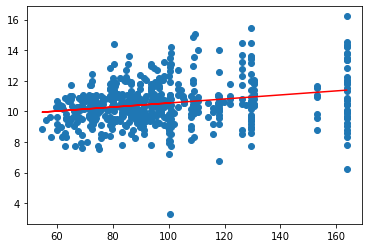

In [102]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2019[['Buying Power']]
y = filtered2019["National Average (by School)"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [103]:
display(result.score(x,y))

0.058032558585206395

9.638529562759816

array([0.0205542])

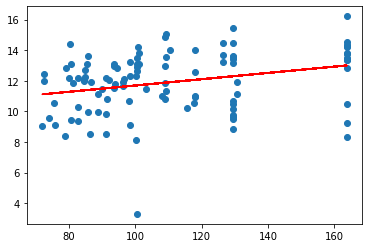

In [100]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2019_private[['Buying Power']]
y = filtered2019_private["National Average (by School)"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [101]:
display(result.score(x,y))

0.07989608430891604

9.843591469073633

array([0.00374859])

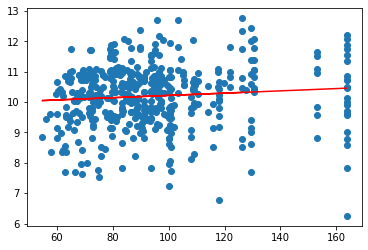

In [98]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2019_public[['Buying Power']]
y = filtered2019_public["National Average (by School)"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [99]:
display(result.score(x,y))

0.008273571934062529

In [ ]:
filtered2017['National Average (by School)'].hist(bins=100)

In [ ]:
def standardize(col):
    z= (col - col.mean())/col.std()
    return z

In [ ]:
filtered2019['National Average (by School) _std'] = standardize(filtered2019['National Average (by School)'])
filtered2019

In [ ]:
import pandas as pd

table = pd.DataFrame([[324, 351, 675],[156, 169, 325],[480,520, 1000]], index = ("Yes", "No", "Total men|women"), columns = ("men", "women"," Total Yes|No"))
print(table)

print("\n")

table=table/1000
print(table)

In [ ]:
filtered2019['National Average (by School) _std'].hist(bins=100)

In [ ]:
st.ttest_rel(filtered2017["National Average (by School)"], filtered2019["National Average (by School)"])

In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2019_out[['Buying Power']]
y = filtered2019_out["National Average (by School)"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [ ]:
display(result.score(x,y))

In [ ]:
filtered2019["National Average (by School)"].median()

In [ ]:
filtered2019["National Average (by School)"].mode()

In [ ]:
filtered2017["National Average (by School)"].mode()

In [ ]:
filtered2019["National Average (by School)"].mode()

In [91]:
import pandas as pd

table = pd.DataFrame([[10.317, 10.512],[10.285, 10.430],[10.620,10.34]], index = ("Mean", "Median", "Mode"), columns = ("2017", "2019"))
#table.loc['Mean'].to_frame().T
table

,2017,2019
Mean,10.317,10.512
Median,10.285,10.430
Mode,10.620,10.340


In [97]:
import pandas as pd

table = pd.DataFrame([[0.17, 0.24],[10.285, 10.430],[10.620,10.34]], index = ("Pearson Correlation - Buying Power vs National Average (by School)", "Median", "Mode"), columns = ("2017", "2019"))
table.loc['Pearson Correlation - Buying Power vs National Average (by School)'].to_frame().T


,2017,2019
Pearson Correlation - Buying Power vs National Average (by School),0.17,0.24


In [80]:
import pandas as pd

table = pd.DataFrame([[11.906, 10.1969]], index = ("Mean"), columns = ("Private 2019", "Public 2019"))
table

TypeError: Index(...) must be called with a collection of some kind, 'Mean' was passed